In [326]:
# Jupyer Notebook Theme: jt -t monokai -f fira -fs 10 -nf ptsans -nfs 11 -N -kl -cursw 2 -cursc r -cellw 95% -T
# Check python version
import sys
cdPyVer = 0x600
cdSysVer = sys.version[:5]
print("%s%s" %("My python version is: ", cdSysVer)) # strangely it works only on 3.7.4 and not 3.7.6

# Import libraries
import pandas as pd
import numpy as np
import warnings


# Visualisation Libraries
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.gridspec import GridSpec
import seaborn as sns
plt.style.use('seaborn-dark') # use this theme as you are using dark theme in the notebook

# SK Learn Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier


# Diplay maximum colums, rows, column_width and float format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
# pd.set_option('display.float_format', lambda x: '%.1f' % x)

warnings.filterwarnings('ignore')

My python version is: 3.9.7


In [327]:
df = pd.read_csv('../datasets/titanic_data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


0### Start Pipeline

In [328]:
# Drop columns not needed!
df.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace = True)

#### Step1: Train-Test-Split

In [329]:
#### Step1: Train-Test-Split
X = df.drop(columns = ['Survived']) # All columns except survived is an input feature
y = df['Survived'] # Dependent variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Ensure training dataset has only 70% of original X data
print(X_train.shape[0] / X.shape[0])

# Ensure testing dataset has only 30% of original X data
print(X_test.shape[0] / X.shape[0])

0.6992143658810326
0.30078563411896747


#### Step2: Inputation, One-Hot Encoding, Scaling, Feature Selection, Model Training

In [330]:
# 177 null values for Age and 2 for Embarked
# Age is index 2
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [331]:
# Age is index 2
# Embarked is index 6
X_train.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
165,3,male,9.0,0,2,20.525,S


In [332]:
#### Inputation transformer
trf1 = ColumnTransformer([
    ('inpute_age', SimpleImputer(), [2]), #Input mean for age
    ('input_embarked', SimpleImputer(strategy='most_frequent'), [6])
], remainder = 'passthrough')

In [333]:
trf2 = ColumnTransformer([
    ('ohe_sex_embarked', OneHotEncoder(sparse=False, handle_unknown='ignore'), [1,6]) # Sex is index 1, Embarked is index 6
], remainder='passthrough')

In [334]:
# Scaling
trf3 = ColumnTransformer([
    ('scale', MinMaxScaler(), slice(0,8))
])

In [335]:
# Feature selection
trf4 = SelectKBest(score_func=chi2,k=8)

In [336]:
# train the model
trf5 = DecisionTreeClassifier()

#### Step3: Create Pipeline

In [337]:
pipe = Pipeline([
    ('simple_inputter',trf1),
    ('one_hot_encoding',trf2),
    ('min_max_scaler',trf3),
    ('feature_selection',trf4),
    ('decision_tree_model',trf5)
])

#### Step4: Train Model

In [338]:
# Display Pipeline

from sklearn import set_config
set_config(display='diagram')

In [339]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simple_inputter',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('inpute_age', SimpleImputer(),
                                                  [2]),
                                                 ('input_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('one_hot_encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('min_max_scaler',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 8, None))])),
                ('feature_selection',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x7fd951460820>)),
                ('decision_tree_model', DecisionTreeClassifier())])

#### Step5: Predict on Test Set

In [340]:
y_pred = pipe.predict(X_test)

In [341]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [342]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

0.6227870967741935

In [343]:
# Check out difference between what my model predicted on testing data and also what really happened!
actual_and_predicted_diff = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
actual_and_predicted_diff.head(5)

,Actual,Predicted
105,0,0
273,0,1
890,0,0
576,1,0
382,0,0


In [344]:
# Evaluate model.
print(f'Score on training set: {pipe.score(X_train, y_train)}')
print(f'Score on testing set: {pipe.score(X_test, y_test)}')

Score on training set: 0.6260032102728732
Score on testing set: 0.667910447761194


In [345]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print(f"Sensitivity/Recall Score: {recall_score(y_test, y_pred)}")
print(f"F1-Score Score: {f1_score(y_test, y_pred)}")

Precision Score: 0.6521739130434783
Sensitivity/Recall Score: 0.2912621359223301
F1-Score Score: 0.4026845637583893


## Purity in Decision Trees

When quantifying how "pure" a node is, we want to see what the distribution of $Y$ is in each node, then summarize this distribution with a number.


- For continuous $Y$ (i.e. using a decision tree to predict income), the default option is mean squared error.
    - This is the `criterion = 'mse'` argument in `DecisionTreeRegressor`.
    - When the decision tree is figuring out which split to make at a given node, it picks the split that maximizes the drop in MSE from the parent node to the child node.


- For discrete $Y$, the default option is the Gini impurity. *(Bonus: This is not quite the same thing as the [Gini coefficient](https://en.wikipedia.org/wiki/Gini_coefficient).)*

$$
\begin{eqnarray*}
\text{Gini impurity} &=& 1 - \sum_{i=1}^{classes} P(\text{class i})^2 \\
\text{Gini impurity (2 classes)} &=& 1 - P(\text{class 1})^2 - P(\text{class 2})^2 \\
\text{Gini impurity (3 classes)} &=& 1 - P(\text{class 1})^2 - P(\text{class 2})^2 - P(\text{class 3})^2 \\
\end{eqnarray*}
$$

<details><summary>What is the Gini impurity of a node when every item is from the same class?</summary>

- Our Gini impurity is zero.

$$
\begin{eqnarray*}
\text{Gini impurity} &=& 1 - \sum_{i=1}^{classes} P(\text{class i})^2 \\
&=& 1 - P(\text{class 1})^2 \\
&=& 1 - 1^2 \\
&=& 1 - 1 \\
&=& 0
\end{eqnarray*}
$$
</details>

<details><summary>What is the Gini impurity of a node when we have three classes, each with two items?</summary>

- Our Gini impurity is 0.6667.

$$
\begin{eqnarray*}
\text{Gini impurity} &=& 1 - \sum_{i=1}^{classes} P(\text{class i})^2 \\
&=& 1 - P(\text{class 1})^2 - P(\text{class 2})^2 - P(\text{class 3})^2 \\
&=& 1 - \left(\frac{1}{3}\right)^2 - \left(\frac{1}{3}\right)^2 - \left(\frac{1}{3}\right)^2 \\
&=& 1 - \frac{1}{9} - \frac{1}{9} - \frac{1}{9} \\
&=& 1 - \frac{1}{3} \\
&=& \frac{2}{3}
\end{eqnarray*}
$$

<details><summary>Summary of Gini Impurity Scores</summary>

- A Gini score of 0 means all of our observations are from the same class!
    - In the binary case, Gini impurity ranges from 0 to 0.5.
- If we have three classes, Gini impurity ranges from 0 to 0.66667.
- If we have $k$ classes, Gini impurity ranges from 0 to $1-\frac{1}{k}$.
</details>

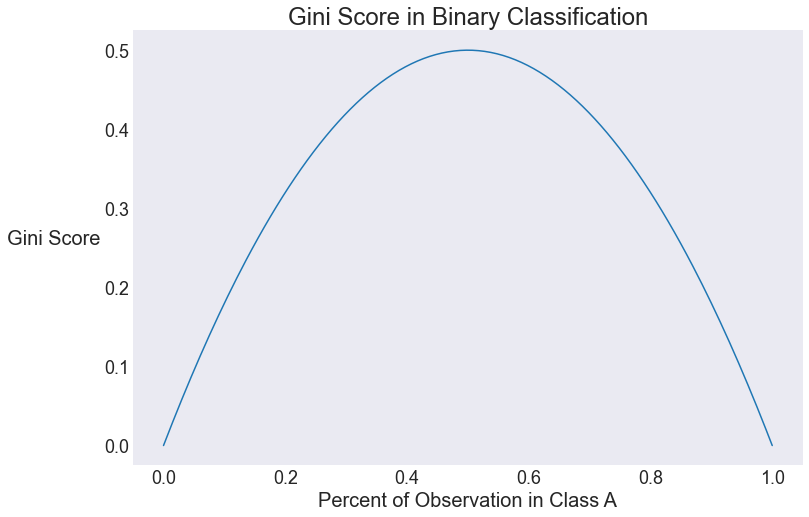

In [346]:
# Set figure size.
plt.figure(figsize = (12,8))

# Generate x values (for percentage of obs. in class A).
percent_in_class_A = np.linspace(0, 1, 200)
percent_in_class_B = 1 - percent_in_class_A

# Calculate Gini values.
gini_values = 1 - np.square(percent_in_class_A) - np.square(percent_in_class_B)

# Plot line.
plt.plot(percent_in_class_A,
         gini_values)

# Establish title, axes, and labels.
plt.title('Gini Score in Binary Classification', fontsize = 24)
plt.xlabel('Percent of Observation in Class A', fontsize = 20)
plt.ylabel('Gini Score', fontsize = 20, rotation = 0, ha = 'right')
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18);

### So how does a decision tree use Gini to decide which variable to split on?

- At any node, consider the subset of our dataframe that exists at that node.
- Iterate through each variable that could potentially split the data.
- Calculate the Gini impurity for every possible split.
- Select the variable that decreases Gini impurity the most from the parent node to the child node.

One consequence of this is that a decision tree is fit using a **greedy** algorithm. Simply put, a decision tree makes the best short-term decision by optimizing at each node individually. _This might mean that our tree isn't optimal in the long run!_

### Hyperparameters of Decision Trees
There are four hyperparameters of decision trees that we may commonly tune in order to prevent overfitting.

- `max_depth`: The maximum depth of the tree.
- By default, the nodes are expanded until all leaves are pure (or some other argument limits the growth of the tree).
- In the 20 questions analogy, this is like "How many questions we can ask?"


- `min_samples_split`: The minimum number of samples required to split an internal node.
- By default, the minimum number of samples required to split is 2. That is, if there are two or more observations in a node and if we haven't already achieved maximum purity, we can split it!


- `min_samples_leaf`: The minimum number of samples required to be in a leaf node (a terminal node at the end of the tree).
- By default, the minimum number of samples required in a leaf node is 1. (This should ring alarm bells - it's very possible that we'll overfit our model to the data!)


- `ccp_alpha`: A [complexity parameter](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning) similar to $\alpha$ in regularization. As `ccp_alpha` increases, we regularize more.
- By default, this value is 0.

[Source: Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

### Let's try GridSearch CV over pipeline!

In [347]:
pipe.get_params()

{'memory': None,
 'steps': [('simple_inputter',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('inpute_age', SimpleImputer(), [2]),
                                   ('input_embarked',
                                    SimpleImputer(strategy='most_frequent'),
                                    [6])])),
  ('one_hot_encoding',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ohe_sex_embarked',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    [1, 6])])),
  ('min_max_scaler',
   ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 8, None))])),
  ('feature_selection',
   SelectKBest(k=8, score_func=<function chi2 at 0x7fd951460820>)),
  ('decision_tree_model', DecisionTreeClassifier())],
 'verbose': False,
 'simple_inputter': ColumnTransformer(remainder='passthrough',
           

<details><summary>How many models are being fit here?</summary>

- 4 * 4 * 5 * 6 * 5 = 2400 models.
</details>

In [348]:
# Dictionary of hyperparameters for Decision Tree Model

grid = GridSearchCV(pipe,
                    param_grid = {'decision_tree_model__max_depth': [2, 3, 5, 7],
                                  'decision_tree_model__min_samples_split': [5, 10, 15, 20],
                                  'decision_tree_model__min_samples_leaf': [2, 3, 4, 5, 6],
                                  'decision_tree_model__ccp_alpha': [0, 0.001, 0.01, 0.1, 1, 10]},
                    cv = 5,
                    verbose = 2)


In [349]:
import time

# Start our timer.
t0 = time.time()

# Let's GridSearch over the above parameters on our training data.
grid = grid.fit(X_train, y_train)

# Stop our timer and print the result.
print(time.time() - t0)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV] END decision_tree_model__ccp_alpha=0, decision_tree_model__max_depth=2, decision_tree_model__min_samples_leaf=2, decision_tree_model__min_samples_split=5; total time=   0.0s
[CV] END decision_tree_model__ccp_alpha=0, decision_tree_model__max_depth=2, decision_tree_model__min_samples_leaf=2, decision_tree_model__min_samples_split=5; total time=   0.0s
[CV] END decision_tree_model__ccp_alpha=0, decision_tree_model__max_depth=2, decision_tree_model__min_samples_leaf=2, decision_tree_model__min_samples_split=5; total time=   0.0s
[CV] END decision_tree_model__ccp_alpha=0, decision_tree_model__max_depth=2, decision_tree_model__min_samples_leaf=2, decision_tree_model__min_samples_split=5; total time=   0.0s
[CV] END decision_tree_model__ccp_alpha=0, decision_tree_model__max_depth=2, decision_tree_model__min_samples_leaf=2, decision_tree_model__min_samples_split=5; total time=   0.1s
[CV] END decision_tree_model__ccp_alpha=0

In [350]:
# What were our best parameters?
grid.best_params_

{'decision_tree_model__ccp_alpha': 0.1,
 'decision_tree_model__max_depth': 2,
 'decision_tree_model__min_samples_leaf': 2,
 'decision_tree_model__min_samples_split': 5}

In [351]:
pd.DataFrame(grid.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decision_tree_model__ccp_alpha,param_decision_tree_model__max_depth,param_decision_tree_model__min_samples_leaf,param_decision_tree_model__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024090,0.006334,0.011029,0.004441,0,2,2,5,"{'decision_tree_model__ccp_alpha': 0, 'decision_tree_model__max_depth': 2, 'decision_tree_model__min_samples_leaf': 2, 'decision_tree_model__min_samples_split': 5}",0.616,0.632,0.592,0.612903,0.596774,0.609935,0.014334,241
1,0.034432,0.008005,0.020110,0.001773,0,2,2,10,"{'decision_tree_model__ccp_alpha': 0, 'decision_tree_model__max_depth': 2, 'decision_tree_model__min_samples_leaf': 2, 'decision_tree_model__min_samples_split': 10}",0.616,0.632,0.592,0.612903,0.596774,0.609935,0.014334,241
2,0.025284,0.002518,0.012084,0.002852,0,2,2,15,"{'decision_tree_model__ccp_alpha': 0, 'decision_tree_model__max_depth': 2, 'decision_tree_model__min_samples_leaf': 2, 'decision_tree_model__min_samples_split': 15}",0.616,0.632,0.592,0.612903,0.596774,0.609935,0.014334,241
3,0.026999,0.008628,0.015864,0.002392,0,2,2,20,"{'decision_tree_model__ccp_alpha': 0, 'decision_tree_model__max_depth': 2, 'decision_tree_model__min_samples_leaf': 2, 'decision_tree_model__min_samples_split': 20}",0.616,0.632,0.592,0.612903,0.596774,0.609935,0.014334,241
4,0.019028,0.002664,0.010289,0.002536,0,2,3,5,"{'decision_tree_model__ccp_alpha': 0, 'decision_tree_model__max_depth': 2, 'decision_tree_model__min_samples_leaf': 3, 'decision_tree_model__min_samples_split': 5}",0.616,0.632,0.592,0.612903,0.596774,0.609935,0.014334,241


In [352]:
# Which was our best decision tree?
grid.best_estimator_

Pipeline(steps=[('simple_inputter',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('inpute_age', SimpleImputer(),
                                                  [2]),
                                                 ('input_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('one_hot_encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('min_max_scaler',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 8, None))])),
                ('feature_selection',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x7fd951460820>)),
                ('decision_tree_model',
                 DecisionTreeClassifier(ccp_alpha=0.1, max_depth=2,
                                        min_samples_leaf=2,
                                        min_samples_split=5))])

In [353]:
# What was the cross-validated score of the above decision tree?
grid.best_score_

0.6163741935483871

In [354]:
# Evaluate model.
print(f'Score on training set: {grid.score(X_train, y_train)}')
print(f'Score on testing set: {grid.score(X_test, y_test)}')

Score on training set: 0.6163723916532905
Score on testing set: 0.6156716417910447


In [355]:
y_pred = grid.predict(X_test)

In [356]:
# Import confusion_matrix.
from sklearn.metrics import confusion_matrix

In [357]:
# Generate confusion matrix.
tn, fp, fn, tp = confusion_matrix(y_test,
                                  y_pred).ravel()

print(confusion_matrix(y_test,
                       y_pred))

[[165   0]
 [103   0]]


In [358]:
# Calculate sensitivity.

sens = tp / (tp + fn)

print(f'Sensitivity: {round(sens, 4)}')

Sensitivity: 0.0


In [359]:
# Calculate specificity.

spec = tn / (tn + fp)

print(f'Specificity: {round(spec, 4)}')

Specificity: 1.0


In [360]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
165,3,male,9.0,0,2,20.525,S
184,3,female,4.0,0,2,22.025,S
211,2,female,35.0,0,0,21.000,S
274,3,female,NaN,0,0,7.750,Q
232,2,male,59.0,0,0,13.500,S


In [361]:
# Import plot_tree from sklearn.tree module.
from sklearn.tree import plot_tree

# Establish size of figure.
plt.figure(figsize = (15, 9))

# Plot our tree.
plot_tree(grid.best_estimator_,
          feature_names = X_train.columns,
          class_names = ['Dead', 'Survived'],
          filled = True);

NotFittedError: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<Figure size 1080x648 with 0 Axes>

In [ ]:
# Import export_text from sklearn.tree module.
from sklearn.tree import export_text

# Print out tree in plaintext.
print(export_text(grid.best_estimator_,
                  list(X_train.columns)))

## Why use a decision tree?


### 1. We don't have to scale our data.
The scale of our inputs don't affect decision trees.

### 2. Decision trees don't make assumptions about how our data is distributed.
Is our data heavily skewed or not normally distributed? Decision trees are nonparametric, meaning we don't make assumptions about how our data or errors are distributed.

### 3. Easy to interpret.
The output of a decision tree is easy to interpret and thus are relatable to non-technical people. (We'll talk about `feature_importance` later.)

### 4. Speed.
Decision trees fit very quickly!

## Why use a decision tree?


### 1. We don't have to scale our data.
The
scale
of
our
inputs
don
't affect decision trees.

### 2. Decision trees don't make assumptions about how our data is distributed.
Is
our
data
heavily
skewed or not normally
distributed? Decision trees are nonparametric, meaning we don't make assumptions about how our data or errors are distributed.

### 3. Easy to interpret.
The
output
of
a
decision
tree is easy
to
interpret and thus
are
relatable
to
non - technical
people.(We
'll talk about `feature_importance` later.)

### 4. Speed.
Decision
trees
fit
very
quickly!
## Why not use a decision tree?

### 1. Decision trees can very easily overfit.
Decision trees often suffer from high error due to variance, so we need to take special care to avoid this.(There are lots of algorithms designed to do exactly this!)

### 2. Decision trees are locally optimal.
Because we're making the best decision at each node (greedy), we might end up with a worse solution in the long run.

### 3. Decision trees don't work well with unbalanced data.
We often will bias our results toward the majority

class . We need to take steps to avoid this as well! (Check out the `class_weight` parameter if you're interested.)